# Objective


In [25]:
# Libraries 
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [4]:
# Data load from API 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
response = requests.get(url)

In [5]:
# Dataframe craetion
df_covid = pd.read_csv(url)
df_covid.to_csv('covid_data.csv', index = False)

In [7]:
# Show dataframe 
df_covid.head(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [16]:
# Exploratory analysis 
df_covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Dataframe contains more than 400,000 rows and 67 columns. 

In [38]:
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [17]:
# Null data 
df_covid.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

Several columns has null data

In [30]:
# Exploring the relation between new cases and people vaccineted
data_nv = df_covid[['date', 'location', 'total_cases', 'new_cases', 'people_vaccinated']].copy()
data_nv.head()

,date,location,total_cases,new_cases,people_vaccinated
0,2020-01-05,Afghanistan,0.0,0.0,NaN
1,2020-01-06,Afghanistan,0.0,0.0,NaN
2,2020-01-07,Afghanistan,0.0,0.0,NaN
3,2020-01-08,Afghanistan,0.0,0.0,NaN
4,2020-01-09,Afghanistan,0.0,0.0,NaN


In [31]:
# new cases per year 
data_nv['date'] = pd.to_datetime(data_nv['date'])
data_nv['year'] = data_nv['date'].dt.year

In [34]:
# Grouping by year and sum all the new cases 
new_cases_per_year = data_nv.groupby('year').agg({'new_cases' : 'sum'})
new_cases_per_year

,new_cases
year,
2020,3.359759e+08
2021,8.390316e+08
2022,1.821211e+09
2023,2.834679e+08
2024,8.705598e+06


In [ ]:
sns.set_style('darkgrid')
sns.barplot()

In [36]:
# Grouping by year all cases sum 
total_cases_per_year = data_nv.groupby('year').agg({'total_cases' : 'sum'})
total_cases_per_year

,total_cases
year,
2020,3.043814e+10
2021,2.762122e+11
2022,8.306192e+11
2023,1.182983e+12
2024,7.128040e+11


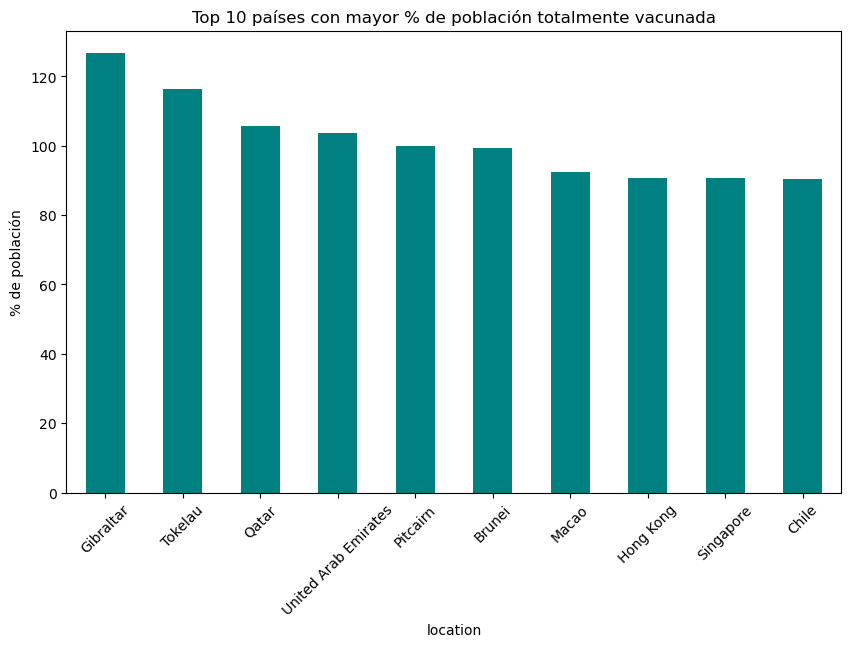

In [40]:

# Top 10 países con mayor % de población totalmente vacunada
top_vaccinated = df_covid.dropna(subset=['people_fully_vaccinated_per_hundred']) \
    .groupby('location')['people_fully_vaccinated_per_hundred'] \
    .max() \
    .sort_values(ascending=False) \
    .head(10)

# Gráfico
plt.figure(figsize=(10, 6))
top_vaccinated.plot(kind='bar', color='teal')
plt.title('Top 10 países con mayor % de población totalmente vacunada')
plt.ylabel('% de población')
plt.xticks(rotation=45)
plt.show()

Matriz de correlación:
                                     people_fully_vaccinated_per_hundred  \
people_fully_vaccinated_per_hundred                             1.000000   
hosp_patients_per_million                                       0.156107   
new_deaths_per_million                                          0.152034   

                                     hosp_patients_per_million  \
people_fully_vaccinated_per_hundred                   0.156107   
hosp_patients_per_million                             1.000000   
new_deaths_per_million                                0.333532   

                                     new_deaths_per_million  
people_fully_vaccinated_per_hundred                0.152034  
hosp_patients_per_million                          0.333532  
new_deaths_per_million                             1.000000  


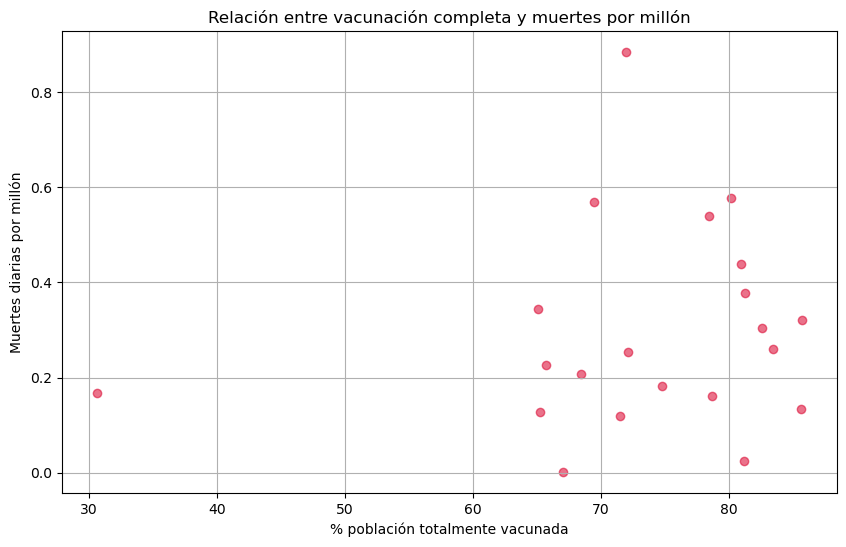

In [42]:
# Filtrar datos relevantes (ejemplo: último mes disponible)
latest_data = df_covid[df_covid['date'] >= '2023-01-01']  # Ajusta la fecha según tus datos

# Agrupar por país y calcular promedios
vaccination_impact = latest_data.groupby('location').agg({
    'people_fully_vaccinated_per_hundred': 'max',
    'hosp_patients_per_million': 'mean',
    'new_deaths_per_million': 'mean'
}).dropna()

# Correlación
correlation = vaccination_impact.corr()
print("Matriz de correlación:")
print(correlation)

# Gráfico de dispersión: Vacunación vs. Muertes
plt.figure(figsize=(10, 6))
plt.scatter(
    vaccination_impact['people_fully_vaccinated_per_hundred'],
    vaccination_impact['new_deaths_per_million'],
    alpha=0.6,
    color='crimson'
)
plt.title('Relación entre vacunación completa y muertes por millón')
plt.xlabel('% población totalmente vacunada')
plt.ylabel('Muertes diarias por millón')
plt.grid(True)
plt.show()

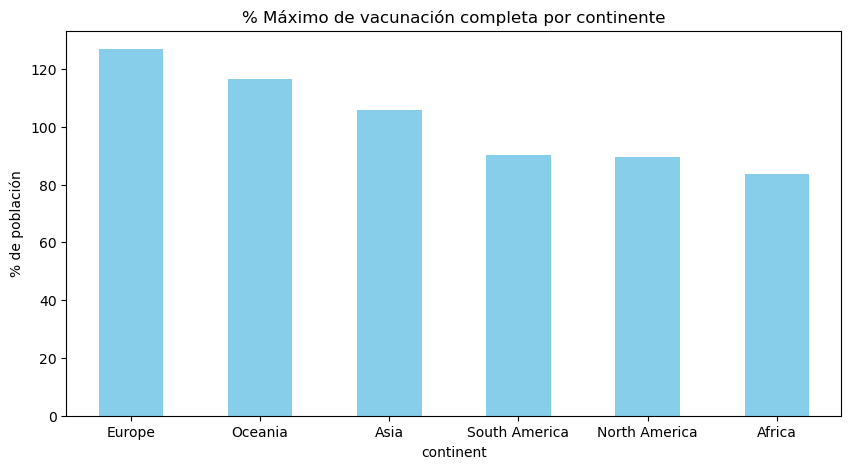

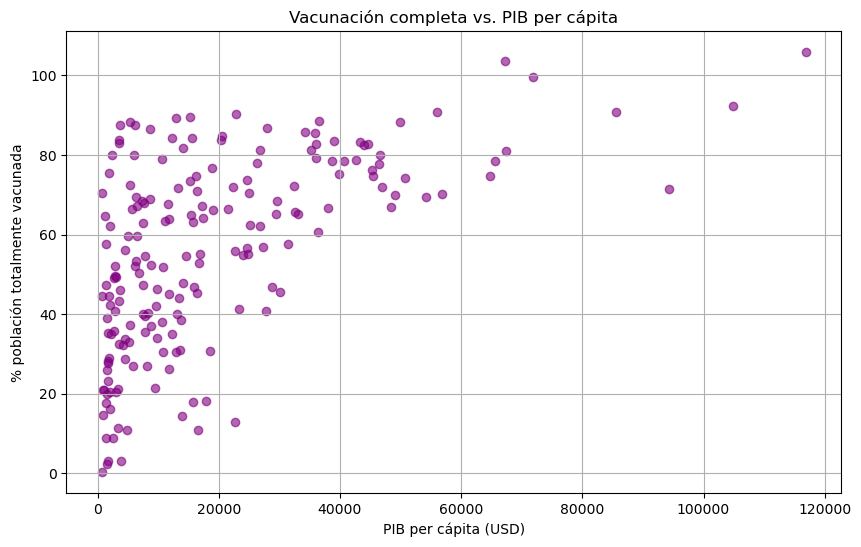

In [45]:
# Vacunación por continente
vaccination_by_continent = df_covid.dropna(subset=['people_fully_vaccinated_per_hundred']) \
    .groupby('continent')['people_fully_vaccinated_per_hundred'] \
    .max() \
    .sort_values(ascending=False)

# Gráfico
vaccination_by_continent.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('% Máximo de vacunación completa por continente')
plt.ylabel('% de población')
plt.xticks(rotation=0)
plt.show()

# Vacunación vs. PIB per cápita
plt.figure(figsize=(10, 6))
plt.scatter(
    df_covid.groupby('location')['gdp_per_capita'].mean(),
    df_covid.groupby('location')['people_fully_vaccinated_per_hundred'].max(),
    alpha=0.6,
    color='purple'
)
plt.title('Vacunación completa vs. PIB per cápita')
plt.xlabel('PIB per cápita (USD)')
plt.ylabel('% población totalmente vacunada')
plt.grid(True)
plt.show()

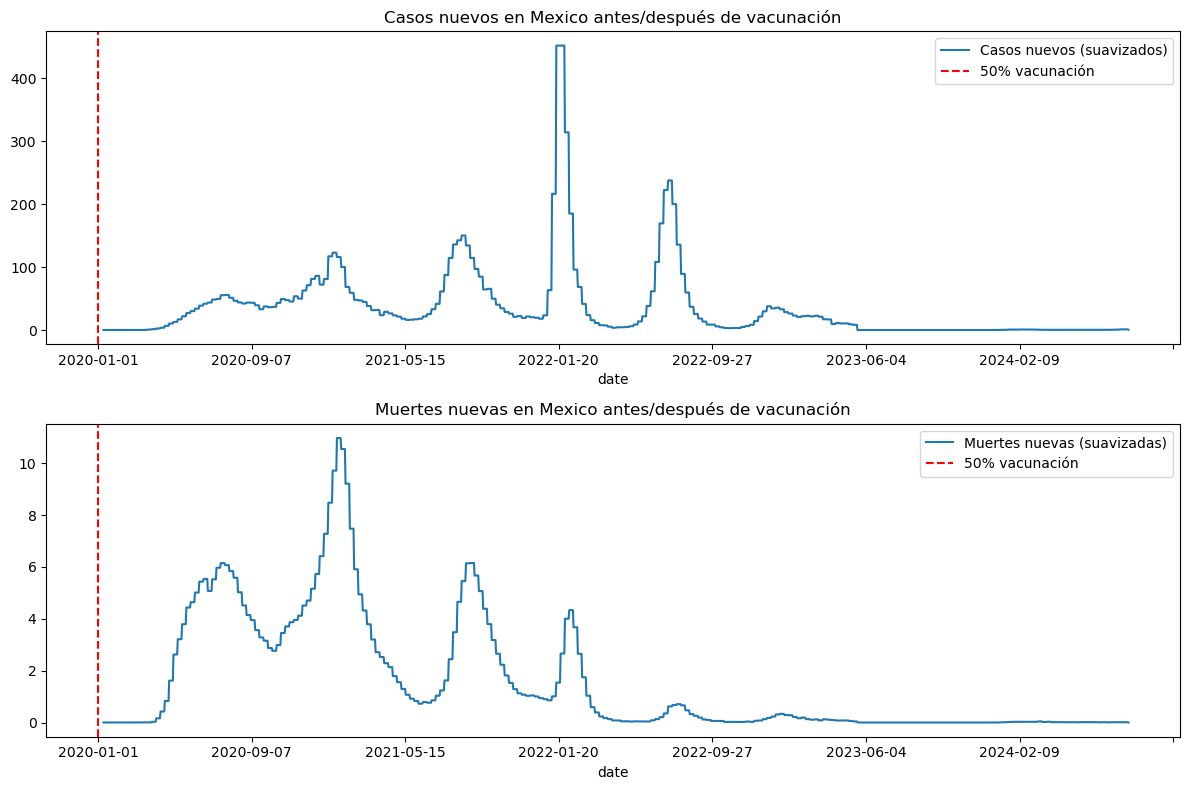

In [47]:
# Ejemplo: Comparar un país antes/después de alcanzar 50% de vacunación
country = 'Mexico'  # Cambia al país de interés
country_data = df_covid[df_covid['location'] == country].set_index('date')

# Encontrar fecha donde se alcanza 50% de vacunación
threshold_date = country_data[country_data['people_fully_vaccinated_per_hundred'] >= 50].index.min()

# Gráfico de casos y muertes antes/después
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
country_data['new_cases_smoothed_per_million'].plot(ax=ax[0], label='Casos nuevos (suavizados)')
ax[0].axvline(threshold_date, color='red', linestyle='--', label='50% vacunación')
ax[0].set_title(f'Casos nuevos en {country} antes/después de vacunación')
ax[0].legend()

country_data['new_deaths_smoothed_per_million'].plot(ax=ax[1], label='Muertes nuevas (suavizadas)')
ax[1].axvline(threshold_date, color='red', linestyle='--', label='50% vacunación')
ax[1].set_title(f'Muertes nuevas en {country} antes/después de vacunación')
ax[1].legend()

plt.tight_layout()
plt.show()